# Kaggle Challenge

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import colorcet as cc
import scipy.io as sio
from sklearn import neighbors

In [2]:
train = pd.read_csv('./Data/Train/trainVectors.csv',header=None)
lbls = pd.read_csv('./Data/Train/trainLbls.csv',header=None)

In [3]:
validation = pd.read_csv('./Data/Validation/valVectors.csv',header=None)
val_lbls = pd.read_csv('./Data/Validation/valLbls.csv',header=None)

In [4]:
print('Original {}'.format(train.shape))
train = train.T
print('Transposed {}'.format(train.shape))
# Images are columns and the features are rows. It must be tranposed to work with sci-kit learn. 
# Be aware might be needed for all
train.head()

Original (4096, 5830)
Transposed (5830, 4096)


,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.0,5.7890,0.0,0.56612,0.99131,4.5717,0.0,5.1703,3.9266,3.4912,...,0.0,0.0,0.0,0.0,1.5381,0.0,0.00000,0.00000,0.0,0.00
1,0.0,3.9499,0.0,0.29012,0.00000,3.1679,0.0,5.5988,1.6824,0.0000,...,0.0,0.0,0.0,0.0,2.2554,0.0,1.26000,0.33829,0.0,0.00
2,0.0,3.8154,0.0,0.00000,0.00000,2.8567,0.0,4.1596,0.0000,3.3156,...,0.0,0.0,0.0,0.0,2.7900,0.0,0.38005,0.00000,0.0,1.49
3,0.0,4.7163,0.0,2.66720,0.00000,3.9262,0.0,5.6187,0.0000,0.0000,...,0.0,0.0,0.0,0.0,2.2257,0.0,3.27060,0.00000,0.0,0.00
4,0.0,5.4124,0.0,3.09340,1.96590,3.3847,0.0,4.3234,2.0984,0.0000,...,0.0,0.0,0.0,0.0,2.0015,0.0,2.07670,0.00000,0.0,0.00


In [5]:
print('Original {}'.format(lbls.shape))
lbls = np.ravel(lbls)
print('Ravelled {}'.format(lbls.shape))

Original (5830, 1)
Ravelled (5830,)


In [6]:
validation = validation.T
val_lbls = np.ravel(val_lbls)

In [7]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(train, lbls)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [8]:
clf.score(validation, val_lbls)

0.6701479547432551

In [9]:
clf = neighbors.KNeighborsClassifier(n_neighbors=3)
clf.fit(train, lbls)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [10]:
clf.score(validation, val_lbls)

0.65970409051349

In [11]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(train, lbls)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
clf.score(validation, val_lbls)

0.6827676240208878

In [13]:
clf = neighbors.KNeighborsClassifier(n_neighbors=11)
clf.fit(train, lbls)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

In [14]:
clf.score(validation, val_lbls)

0.6875543951261966

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2)
PC = pca.fit_transform(train)

In [17]:
pca.score(validation,val_lbls)

-4952.095742563028

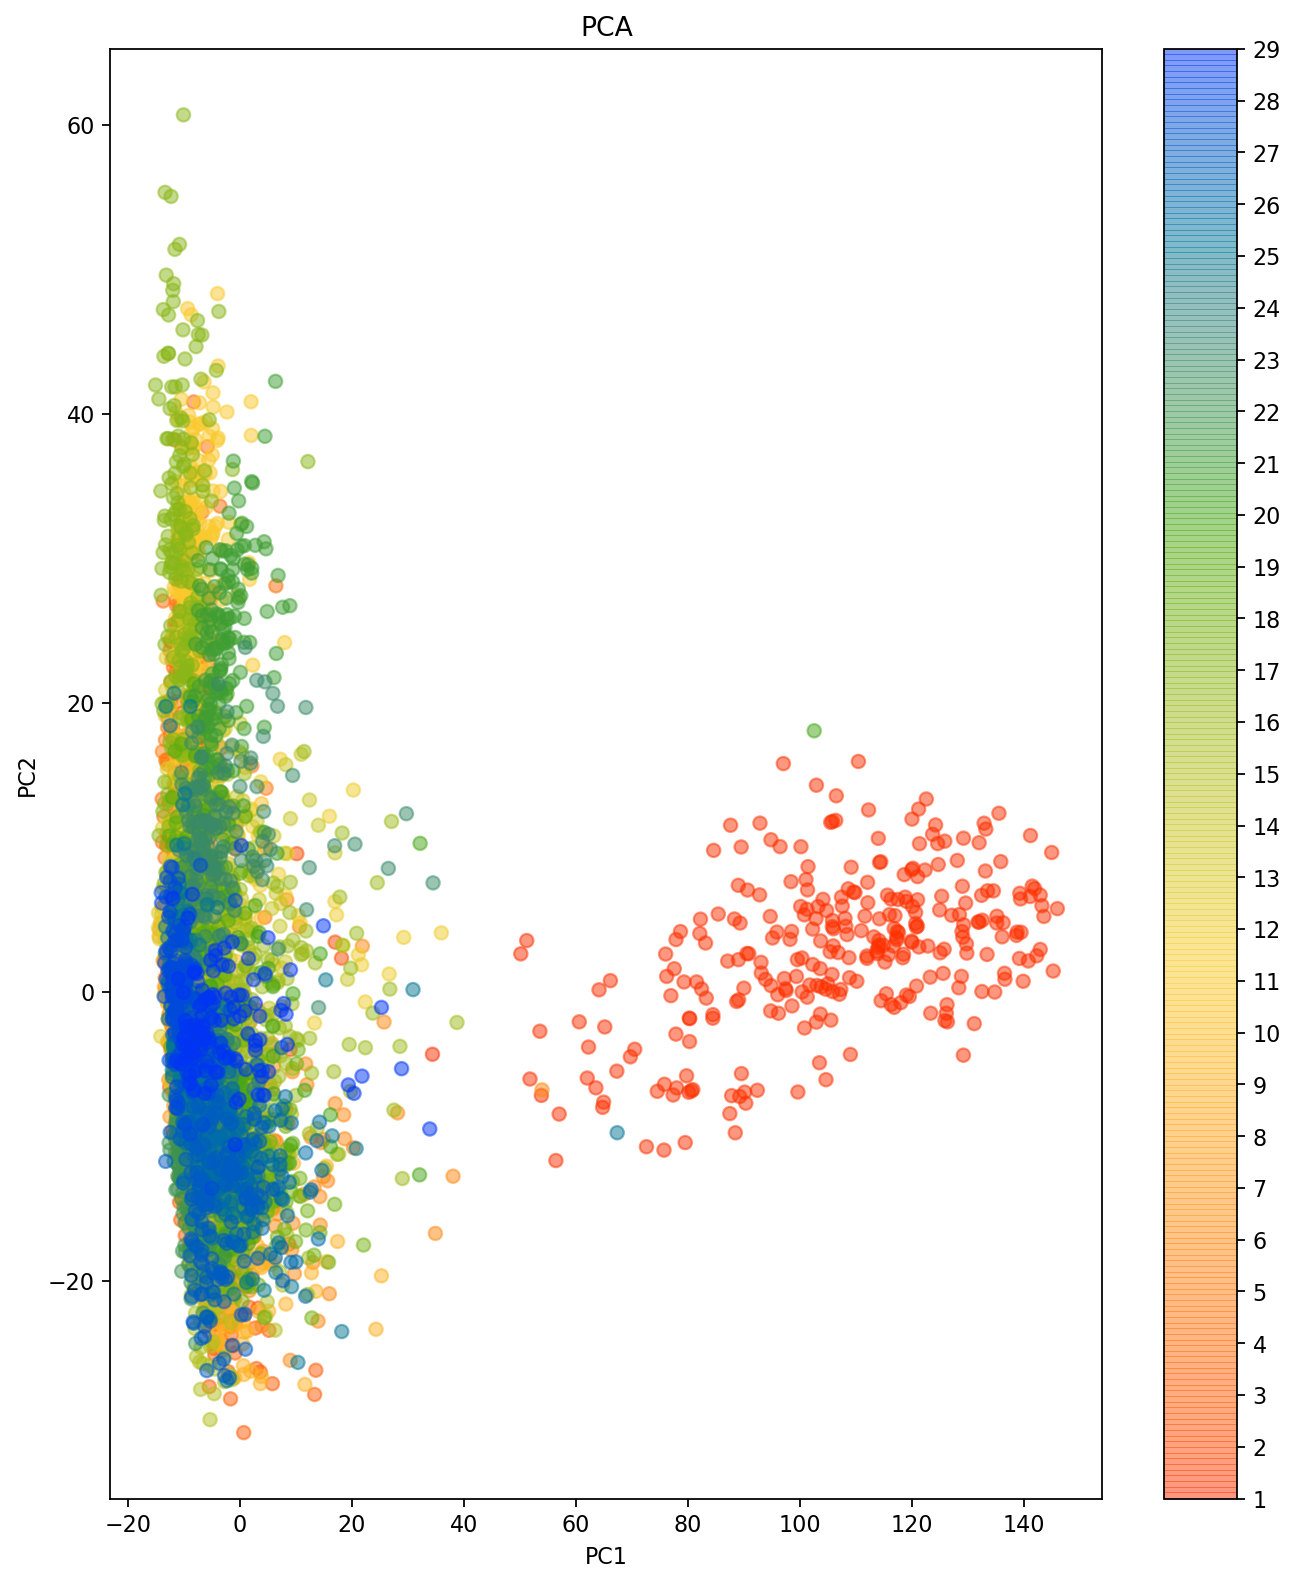

In [25]:
x_test = []
y_test = []
for i in PC:
    x_test.append(i[0])
    y_test.append(i[1])
    
plot_aspect = 1.2
plot_height = 10.0
plot_width = int(plot_height*plot_aspect)
cbar_max = 39
cbar_min = 0
cbar_step = 1.0
    
size_test = []
for i in PC:
    new_size = i/len(PC)
    size_test.append(10000*new_size+100)
fig, ax = plt.subplots(figsize=(plot_height,plot_width),dpi= 160, facecolor='w', edgecolor='k')
im = ax.scatter(x_test, y_test, c=lbls, alpha = 0.5, cmap = cc.m_rainbow_bgyr_35_85_c72_r)
fig.colorbar(im, ax=ax, ticks=np.arange(cbar_min, cbar_max+cbar_step, cbar_step))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [27]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [28]:
LD = lda.fit_transform(train, lbls)

In [29]:
lda.score(validation,val_lbls)

0.6823324630113142

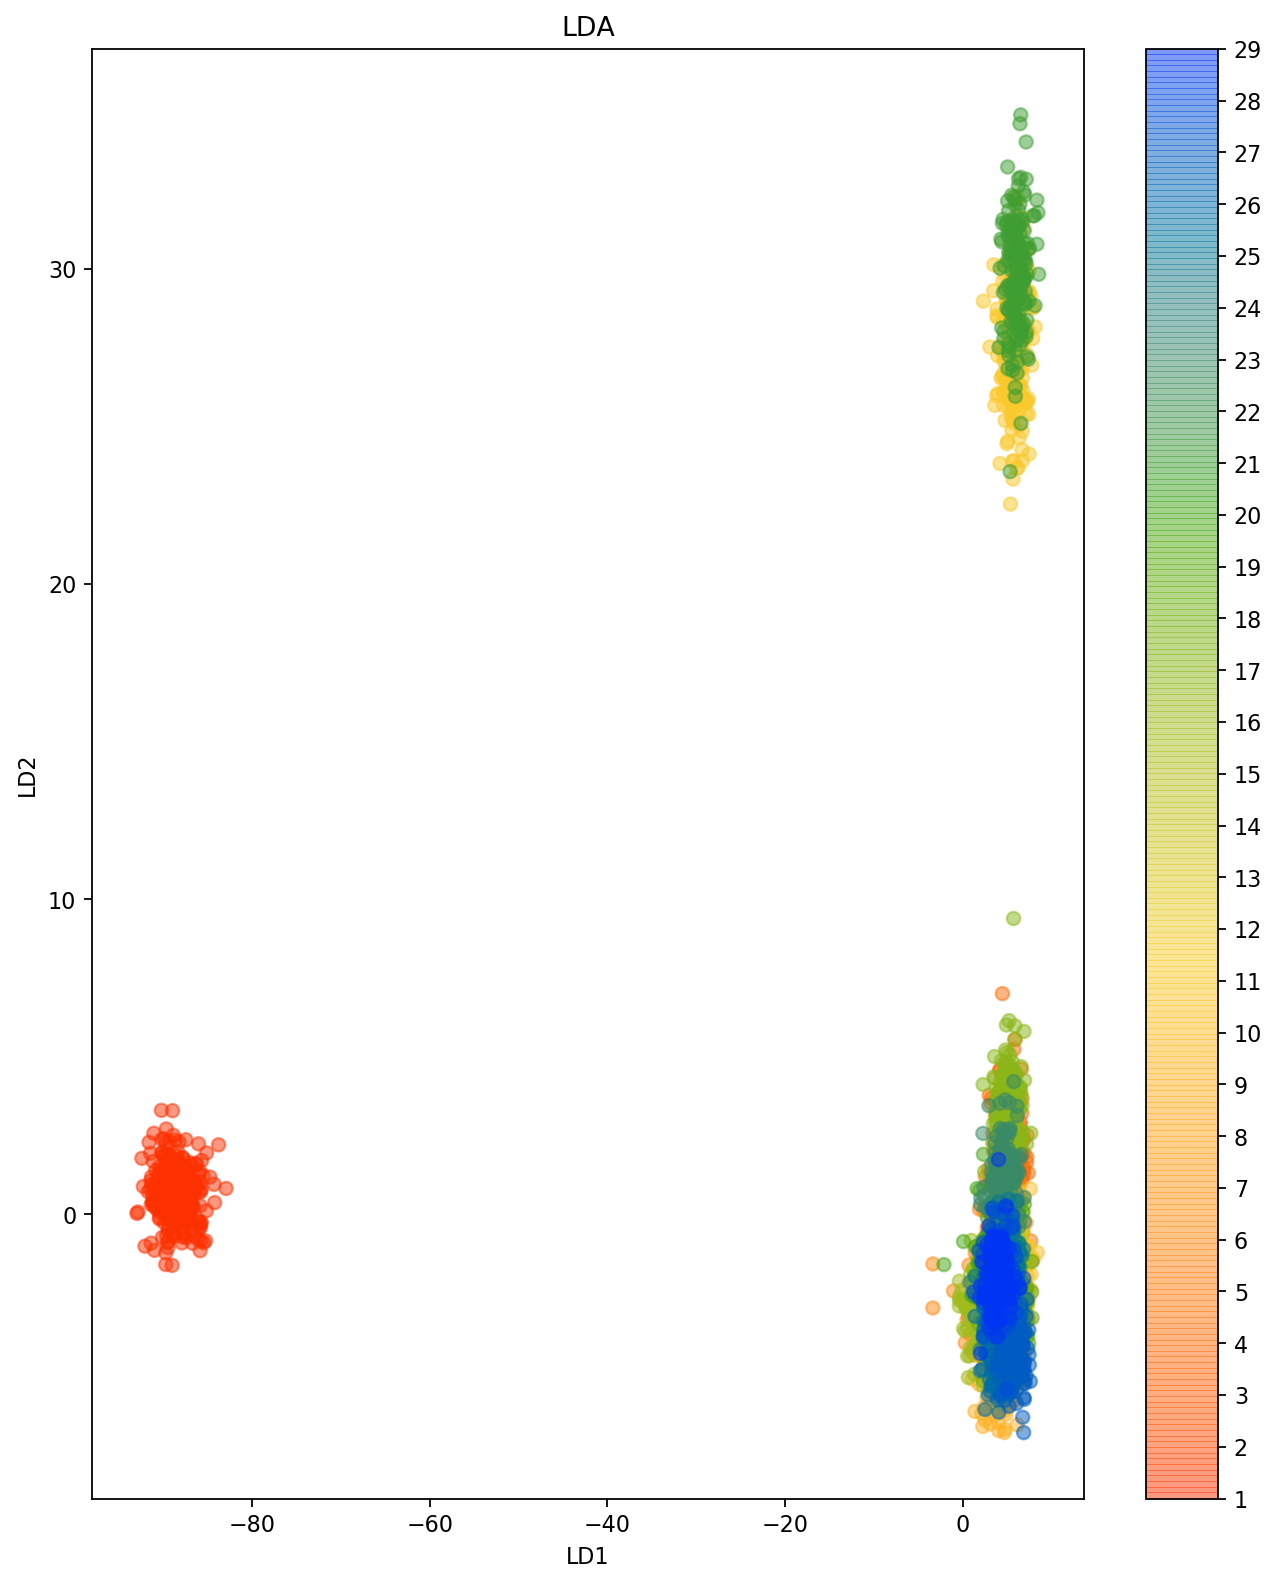

In [30]:
x_test = []
y_test = []
for i in LD:
    x_test.append(i[0])
    y_test.append(i[1])
    
plot_aspect = 1.2
plot_height = 10.0
plot_width = int(plot_height*plot_aspect)
cbar_max = 39
cbar_min = 0
cbar_step = 1.0
    
size_test = []
for i in LD:
    new_size = i/len(LD)
    size_test.append(10000*new_size+100)
fig, ax = plt.subplots(figsize=(plot_height,plot_width), dpi= 160, facecolor='w', edgecolor='k')
im = ax.scatter(x_test, y_test, c=lbls, alpha = 0.5, cmap = cc.m_rainbow_bgyr_35_85_c72_r)
fig.colorbar(im, ax=ax, ticks=np.arange(cbar_min, cbar_max+cbar_step, cbar_step))
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA')
plt.show()

In [16]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [17]:
qda = QuadraticDiscriminantAnalysis()

In [18]:
qda.fit(train,lbls)

C:\Users\ajk\.venv\Kaggle\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [19]:
qda.score(validation, val_lbls)

0.07180156657963446